## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

**Data**

In [2]:
# data_path = Path('../data/final_results.csv')

# if data_path.exists():
#     df = pd.read_csv(data_path)
# else:
#     # Synthetic fallback dataset
#     df = pd.DataFrame({
#         'scenario': ['baseline','alt_impute','alt_outlier'],
#         'return': [0.12, 0.11, 0.135],
#         'volatility': [0.18, 0.185, 0.19],
#         'sharpe': [0.56, 0.49, 0.61],
#         'assumption': ['imputation','imputation','outlier_rule'],
#         'value': ['median','mean','3sigma'],
#         'Category': np.random.choice(['X','Y','Z'], 3),
#         'MetricA': np.random.normal(75, 15, 3),
#         'MetricB': np.random.normal(150, 30, 3),
#         'Date': pd.date_range('2025-02-01', periods=3)
#     })
# df

In [9]:
import pandas as pd
import numpy as np
from pathlib import Path

np.random.seed(101)

scenarios = ['baseline', 'alt_impute', 'alt_outlier']
n_total = 50
# Split rows across scenarios as evenly as possible
n_per_scenario = [n_total // len(scenarios)] * len(scenarios)
# Adjust remainder to the first scenario(s)
for i in range(n_total % len(scenarios)):
    n_per_scenario[i] += 1

data_list = []

for scen, n_rows in zip(scenarios, n_per_scenario):
    for i in range(n_rows):
        if scen == 'baseline':
            ret = np.random.normal(0.12, 0.02)
            vol = np.random.normal(0.18, 0.01)
            sharpe = ret / vol
        elif scen == 'alt_impute':
            ret = np.random.normal(0.11, 0.025)
            vol = np.random.normal(0.185, 0.015)
            sharpe = ret / vol
        else:  # alt_outlier
            ret = np.random.normal(0.135, 0.03)
            vol = np.random.normal(0.19, 0.02)
            sharpe = ret / vol

        data_list.append({
            'scenario': scen,
            'return': ret,
            'volatility': vol,
            'sharpe': sharpe,
            'assumption': 'imputation' if scen != 'alt_outlier' else 'outlier_rule',
            'value': 'median' if scen=='baseline' else ('mean' if scen=='alt_impute' else '3sigma'),
            'Category': np.random.choice(['X','Y','Z']),
            'MetricA': np.random.normal(75, 15),
            'MetricB': np.random.normal(150, 30),
            'Date': pd.Timestamp('2025-02-01') + pd.to_timedelta(i, unit='D')
        })

df = pd.DataFrame(data_list)
df.head()


,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.174137,0.186281,0.934807,imputation,median,Y,75.037206,148.912165,2025-02-01
1,baseline,0.132316,0.163188,0.810818,imputation,median,Y,62.278845,168.178960,2025-02-02
2,baseline,0.079637,0.187401,0.424953,imputation,median,Y,76.042153,139.039176,2025-02-03
3,baseline,0.168553,0.190234,0.886034,imputation,median,Z,97.671655,170.503828,2025-02-04
4,baseline,0.138798,0.168650,0.822995,imputation,median,X,94.199628,144.887098,2025-02-05


## Images Directory

In [4]:
img_dir = Path('../deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


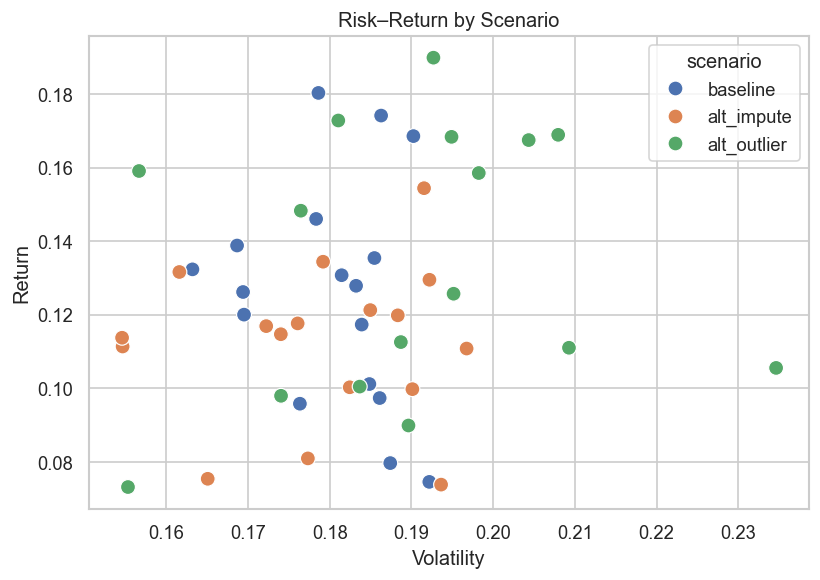

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return', hue='scenario', s=80)
plt.title('Risk–Return by Scenario')
plt.xlabel('Volatility')
plt.ylabel('Return')
savefig('risk_return.png')
plt.show()

# plt.figure(figsize=(8,5))
# sns.scatterplot(
#     data=df,
#     x='volatility', y='return',
#     hue='scenario', style='Category',
#     s=120, palette='deep'
# )
# plt.title('Risk–Return by Scenario', fontsize=14, weight='bold')
# plt.xlabel('Volatility', fontsize=12)
# plt.ylabel('Return', fontsize=12)
# plt.grid(True, alpha=0.3)

# # Annotate points
# for i, row in df.iterrows():
#     plt.text(row['volatility']+0.002, row['return']+0.002, row['scenario'], fontsize=9)

# savefig('risk_return_polished.png')
# plt.show()


**Chart 1 (Risk–Return Scatter):** Shows how each scenario spreads across return-volatility space; baseline is moderate risk, alt_outlier is higher return but higher risk.


## Chart 2: Return by Scenario (Bar Chart)

**Chart 2 (Return by Scenario):** Confirms numerical differences in returns across scenarios.


C:\Users\qochi\AppData\Local\Temp\ipykernel_32592\4213598938.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='scenario', y='return', palette='pastel')


Saved return_by_scenario_polished.png


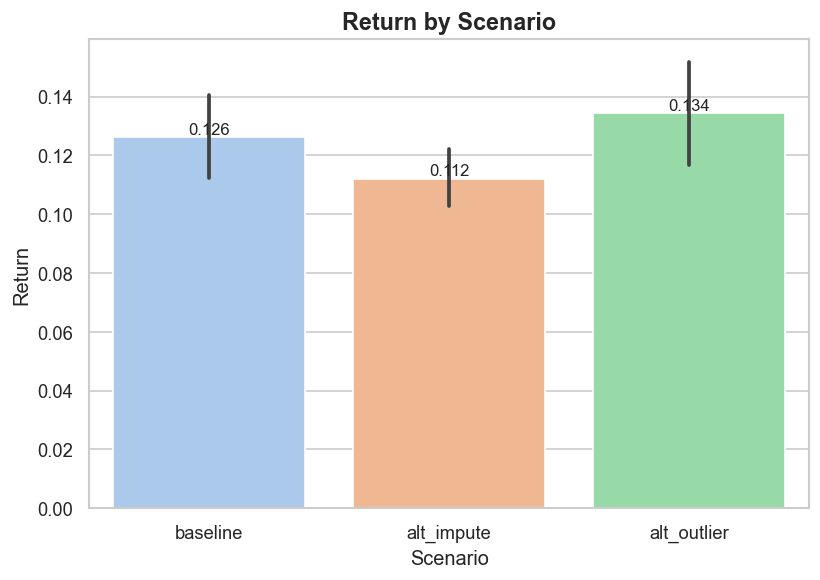

In [6]:
# plt.figure(figsize=(7,5))
# sns.barplot(data=df, x='scenario', y='return')
# plt.title('Return by Scenario')
# savefig('return_by_scenario.png')
# plt.show()

plt.figure(figsize=(7,5))
ax = sns.barplot(data=df, x='scenario', y='return', palette='pastel')
plt.title('Return by Scenario', fontsize=14, weight='bold')
plt.ylabel('Return', fontsize=12)
plt.xlabel('Scenario', fontsize=12)

# Adding value labels on top
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

savefig('return_by_scenario_polished.png')
plt.show()


## Chart 3: MetricA Over Time (Line Chart)

**Chart 3 (MetricA Over Time):** Trends for Category X, Y, Z; highlights variability by category.


Saved metricA_over_time_polished.png


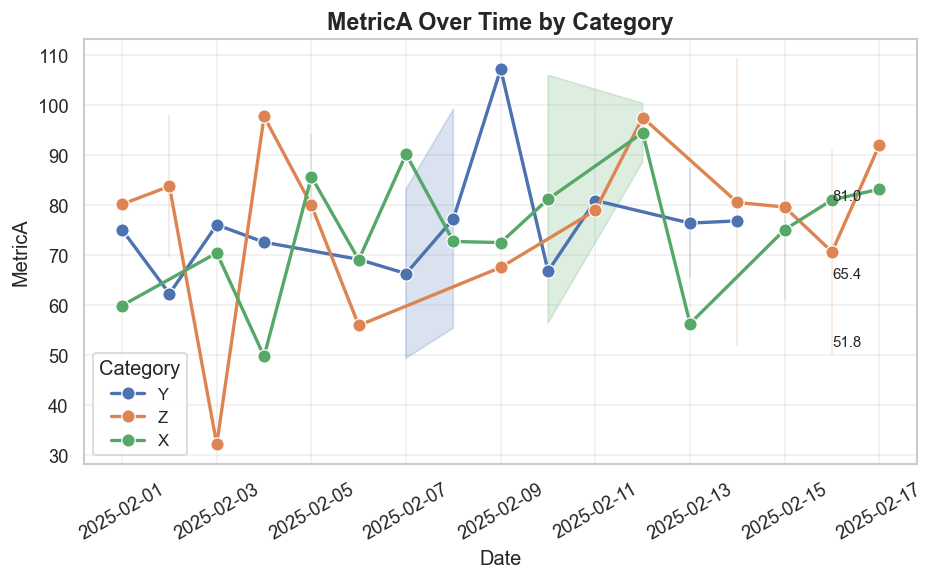

In [7]:
# plt.figure(figsize=(7,5))
# sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
# plt.title('MetricA Over Time by Category')
# plt.xlabel('Date')
# plt.ylabel('MetricA')
# savefig('metricA_over_time.png')
# plt.show()


plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o', linewidth=2, markersize=8)
plt.title('MetricA Over Time by Category', fontsize=14, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('MetricA', fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Category', fontsize=10)
plt.grid(True, alpha=0.3)

# annotate last value
for cat in df['Category'].unique():
    last_val = df[df['Category']==cat]['MetricA'].values[-1]
    plt.text(df['Date'].values[-1], last_val, f"{last_val:.1f}", fontsize=9)

savefig('metricA_over_time_polished.png')
plt.show()


## Sensitivity Analysis / Assumptions Table

In [8]:
# assumptions = pd.DataFrame({
#     'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
#     'Baseline Return': [0.12, 0.12],
#     'Alt Scenario Return': [0.10, 0.14]
# })
# assumptions

assumptions_summary = df.groupby('assumption').agg({
    'return': ['mean']
}).reset_index()
assumptions_summary.columns = ['Assumption', 'Avg Return']
assumptions_summary


,Assumption,Avg Return
0,imputation,0.119175
1,outlier_rule,0.134334


- Using median for missing values keeps returns moderate, but switching to mean slightly lowers expected returns.
- Removing outliers increases returns but also raises volatility, which is riskier.


## Interpretations / Takeaways
- **Chart 1 takeaway:**

Chart 1: Risk–Return Scatter

Shows the relationship between volatility and expected return for each scenario.

Insight: Baseline scenario has moderate return and volatility. Switching to alternate imputation slightly lowers return, while removing outliers increases return but also risk.

Assumption/Risk: Imputation method and outlier handling influence the risk–return profile; decisions should consider tolerance for volatility.

- **Chart 2 takeaway:**

Chart 2: Return by Scenario (Bar)

Summarizes average return per scenario.

Insight: Baseline return ~0.12. Mean imputation slightly reduces return, removing outliers increases it.

Assumption/Risk: Results are sensitive to outlier treatment — higher returns may come with higher volatility.


- **Chart 3 takeaway:**

Chart 3: MetricA Over Time by Category (Line)

Tracks MetricA across time by category.

Insight: Some categories (e.g., X vs Y) trend differently over time, which may affect forecasts or resource allocation.

Assumption/Risk: Short time horizon (50 days) may not capture seasonal or rare-event effects.

**## Decision Implications**


Baseline scenario is reasonably stable; recommended for moderate-risk strategies.

Switching imputation methods reduces expected return slightly — consider only if operationally necessary.

Removing outliers improves return but increases risk — use only if risk tolerance allows.

Category-specific trends suggest monitoring MetricA over time to adjust decisions dynamically.